In [2]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB 1.4 MB/s eta 0:00:01
   --------- ------------------------------ 71.7/294.9 kB 1.3 MB/s eta 0:00:01
   ---------------- ----------------------- 122.9/294.9 kB 1.0 MB/s eta 0:00:01
   --------------------------- ------------ 204.8/294.9 kB 1.4 MB/s eta 0:00:01
   ------------------------------------- -- 276.5/294.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import librosa
import tensorflow as tf
import IPython.display as ipd

from scipy.io import wavfile as wav
from tensorflow import keras
from keras.callbacks import EarlyStopping
from tqdm import tqdm
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from IPython.display import Audio
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

Каждый аудиосигнал обладает уникальными характеристиками. При обработке звука частотный диапазон низких частот (MFC) представляет собой кратковременный спектр мощности звука, отражающий его тембральные качества. Низкочастотные кепстральные коэффициенты (MFCC) - это отдельные коэффициенты, которые вместе образуют MFC.



Используя библиотеку librosa, мы извлекаем эти характеристики из каждого аудиосигнала в нашем наборе данных и сохраняем их в виде списка.

In [4]:
audio_dataset_path = "data/input/urbansound8k/"
metadata = pd.read_csv("data/input/urbansound8k/UrbanSound8K.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [5]:
!pip install resampy


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\Алина\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [6]:
import resampy

In [7]:
!pip install --upgrade librosa numpy scipy soundfile resampy

  Using cached numpy-2.2.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
   ---------------------------------------- 0.3/43.6 MB ? eta -:--:--
   ---------------------------------------- 0.5/43.6 MB 2.1 MB/s eta 0:00:21
    --------------------------------------- 1.0/43.6 MB 2.5 MB/s eta 0:00:17
   - -------------------------------------- 1.6/43.6 MB 2.3 MB/s eta 0:00:19
   -- ------------------------------------- 2.4/43.6 MB 2.5 MB/s eta 0:00:17
   -- ------------------------------------- 3.1/43.6 MB 2.8 MB/s eta 0:00:15
   --- ------------------------------------ 3.7/43.6 MB 2.8 MB/s eta 0:00:15
   --- ------------------------------------ 4.2/43.6 MB 2.9 MB/s eta 0:00:14
   ---- ----------------------------------- 5.0/43.6 MB 2.9 MB/s eta 0:00:14
   ----- ---------------------------------- 5.5/43.6 MB 2.9 MB/s eta 0:00:14
   ----- ---------------------------------- 6.3/43.6 MB 3.0 MB/s eta 0:00:13
   ------ ----------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.0.2 which is incompatible.
contourpy 1.1.1 requires numpy<2.0,>=1.26.0rc1; python_version >= "3.12", but you have numpy 2.0.2 which is incompatible.
matplotlib 3.8.0 requires numpy<2,>=1.21, but you have numpy 2.0.2 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\Алина\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [8]:
!pip install numpy==1.26.4 scipy==1.13.1

  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/45.9 MB 1.7 MB/s eta 0:00:28
    --------------------------------------- 0.8/45.9 MB 1.5 MB/s eta 0:00:30
    --------------------------------------- 1.0/45.9 MB 1.6 MB/s eta 0:00:28
   - -------------------------------------- 1.3/45.9 MB 1.5 MB/s eta 0:00:30
   - -------------------------------------- 1.6/45.9 MB 1.4 MB/s eta 0:00:32
   - -------------------------------------- 1.8/45.9 MB 1.4 MB/s eta 0:00:32
   -- ------------------------------------- 2.4/45.9 MB 1.5 MB/s eta 0:00:29
   -- ------------------------------------- 2.6/45.9 MB 1.5 MB/s eta 0:00:30
   -- ------------------------------------- 2.9/45.9 MB 1.5 MB/s eta 0:00:29
   -- ----------------------------


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\Алина\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [10]:
# Функция для извлечения признаков из аудио-файлов
def mfcc_features_extractor(file):
    audio, sample_rate = librosa.load(file)
    print(sample_rate)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

In [ ]:
# Извлечение признаков из аудио-файлов
extracted_features = []
for _, row in tqdm(metadata.iterrows(), total=len(metadata)):
    file_name = os.path.join(
        audio_dataset_path, f"fold{row['fold']}/{row['slice_file_name']}"
    )
    if os.path.exists(file_name):
        final_class_label = row["class"]
        data = mfcc_features_extractor(file_name)
        extracted_features.append([data, final_class_label])
    else:
        print(f"File not found: {file_name}")

In [12]:
# Преобразование списка признаков в DataFrame
extracted_features_df = pd.DataFrame(extracted_features, columns=["feature", "class"])
extracted_features_df

,feature,class
0,"[-211.93698, 62.581203, -122.81315, -60.745293...",dog_bark
1,"[-417.0052, 99.336624, -42.995586, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.578068, 43.195866,...",children_playing
3,"[-406.47922, 91.1966, -25.043556, 42.78452, 11...",children_playing
4,"[-439.63873, 103.86223, -42.658783, 50.690277,...",children_playing
...,...,...
8727,"[-391.3721, 125.36239, -40.634056, 25.899754, ...",car_horn
8728,"[-339.42715, 76.409096, -35.30988, 41.984035, ...",car_horn
8729,"[-297.31534, 102.09026, -36.75108, 26.816488, ...",car_horn
8730,"[-336.92386, 115.3139, -44.84709, 24.968985, -...",car_horn


In [16]:
X = np.array(extracted_features_df["feature"].tolist())
y = np.array(extracted_features_df["class"].tolist())


In [19]:
# 1 0 0 0 0 0 0 0 0 0 => air_conditioner
# 0 1 0 0 0 0 0 0 0 0 => car_horn
# 0 0 1 0 0 0 0 0 0 0 => children_playing
# 0 0 0 1 0 0 0 0 0 0 => dog_bark
# ...
# 0 0 0 0 0 0 0 0 0 1 => street_music

labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(40,)))

    # Настройка количества слоев и параметров
    num_layers = hp.Int("num_of_layers", min_value=1, max_value=5, step=1)
    for i in range(num_layers):
        model.add(
            keras.layers.Dense(
                units=hp.Int(f"units_layer_{i}", min_value=32, max_value=512, step=32),
                activation="relu",
            )
        )
        model.add(
            keras.layers.Dropout(
                rate=hp.Float("dropout_rate", min_value=0.1, max_value=0.5, step=0.1)
            )
        )

    model.add(keras.layers.Dense(10, activation="softmax"))
    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
        ),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model




In [29]:
# Использование Keras Tuner для подбора гиперпараметров
tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=10,
    max_retries_per_trial=3,
    directory="data/working/",
    project_name="Audio_classification",
)

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

# Определение callback для ранней остановки
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Поиск лучших гиперпараметров с использованием ранней остановки
tuner.search(X_train, y_train, epochs=150, validation_data=(X_test, y_test), callbacks=[early_stopping])

best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

model = tuner.hypermodel.build(best_hp)
# Обучение модели с лучшими параметрами и использованием ранней остановки
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])

Trial 10 Complete [00h 00m 48s]
val_accuracy: 0.7962220907211304

Best val_accuracy So Far: 0.9324556589126587
Total elapsed time: 00h 09m 37s
Epoch 1/100
219/219 [==============================] - 2s 5ms/step - loss: 3.1825 - accuracy: 0.1483 - val_loss: 2.2115 - val_accuracy: 0.1866
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 2.2327 - accuracy: 0.1795 - val_loss: 2.1237 - val_accuracy: 0.2129
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 2.1154 - accuracy: 0.2242 - val_loss: 1.9609 - val_accuracy: 0.2816
Epoch 4/100
219/219 [==============================] - 1s 5ms/step - loss: 2.0174 - accuracy: 0.2839 - val_loss: 1.8234 - val_accuracy: 0.3847
Epoch 5/100
219/219 [==============================] - 1s 5ms/step - loss: 1.9086 - accuracy: 0.3330 - val_loss: 1.6469 - val_accuracy: 0.4596
Epoch 6/100
219/219 [==============================] - 1s 5ms/step - loss: 1.7740 - accuracy: 0.3845 - val_loss: 1.5044 - val_accuracy: 0.4963

55/55 [==============================] - 0s 1ms/step
Accuracy: 0.9175729822552948
Precision: 0.9182561578837979
Recall: 0.9175729822552948
F1-Score: 0.917466641320916
Confusion Matrix:
[[193   0   0   0   0   0   0   0   0   2]
 [  0  81   1   2   2   0   0   2   0   3]
 [  3   0 171   7   1   3   1   1   3  15]
 [  3   0  10 159   0   1   3   0   1   5]
 [  0   0   1   2 189   1   0   6   1   2]
 [  0   0   1   1   0 211   0   0   1   2]
 [  0   0   4   7   1   1  72   0   1   1]
 [  1   0   0   0   4   0   0 178   0   4]
 [  0   0   4   1   0   0   0   0 193   1]
 [  1   0  10   4   1   5   1   4   1 156]]


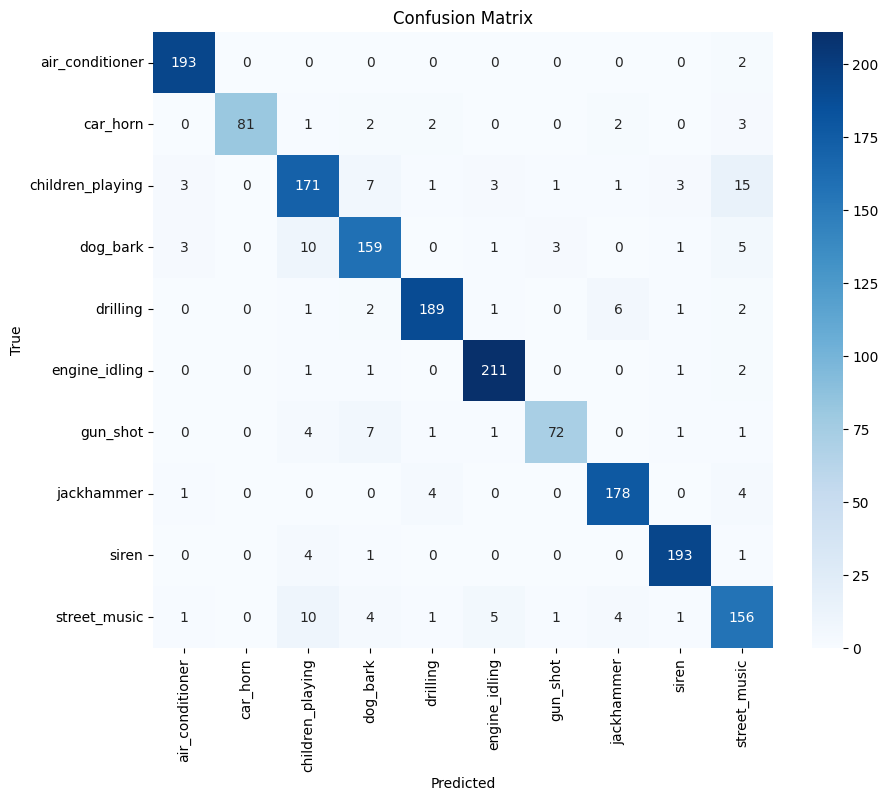

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labelencoder.classes_, yticklabels=labelencoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [35]:
# Преобразование модели в формат TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


# Сохранение модели в файл
with open("sound_classifier_model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\8ADB~1\AppData\Local\Temp\tmpn1el0o90\assets


INFO:tensorflow:Assets written to: C:\Users\8ADB~1\AppData\Local\Temp\tmpn1el0o90\assets


In [39]:
def load_tflite_model(model_path):
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()
    return interpreter

def predict_with_tflite(interpreter, input_data):
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    input_data = np.array(input_data, dtype=np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    return output_data

def extract_mfcc(file_path, n_mfcc=40):
    audio, sample_rate = librosa.load(file_path, duration = 4)
    print(sample_rate)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

model_path = "sound_classifier_model.tflite"
audio_file = "experiment/sirena-na-politseyskoy-mashine-loop-26795.wav"

interpreter = load_tflite_model(model_path)

mfcc_features = extract_mfcc(audio_file)
mfcc_features = mfcc_features.reshape(1, -1)

predictions = predict_with_tflite(interpreter, mfcc_features)
predicted_label = np.argmax(predictions, axis=1)

# 0 = air_conditioner
# 1 = car_horn
# 2 = children_playing
# 3 = dog_bark
# 4 = drilling
# 5 = engine_idling
# 6 = gun_shot
# 7 = jackhammer
# 8 = siren
# 9 = street_music

print("Вероятность каждого класса:\n", predictions)
print("Предсказанный класс:\n", predicted_label)

22050
Вероятность каждого класса:
 [[1.0531213e-07 1.5949658e-08 1.6389768e-06 1.0984709e-02 1.1983295e-06
  8.6816924e-04 2.8580200e-04 6.6948787e-11 9.8783743e-01 2.0956788e-05]]
Предсказанный класс:
 [8]
